In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
sns.set_theme()

In [4]:
import os

In [95]:
results_root = '/home/kwatchar3/bss_spatial_eval'

ddfs = [
    # {
    #     'delay': 8,
    #     'path': 'results/20221127220450/results-ok.csv'
    # },
    # {
    #     'delay': 16,
    #     'path': 'results/20221127220127/results-ok.csv'
    # },
    # {
    #     'delay': 32,
    #     'path': 'results/20221127220630/results-ok.csv'
    # },
    # {
    #     'delay': 64,
    #     'path': 'results/20221127220816/results-ok.csv'
    # },
    # {
    #     'delay': 128,
    #     'path': 'results/20221127220959/results-ok.csv'
    # },
    # {
    #     'delay': 256,
    #     'path': 'results/20221127221438/results-ok.csv'
    # },
    # {
    #     'delay': 512,
    #     'path': 'results/20221127221628/results-ok.csv'
    # },
    {
        'delay': 1024,
        'path': 'results/20221127221852/results-ok.csv'
    },
    {
        'delay': 2048,
        'path': 'results/20221127231319/results-ok.csv'
    },
    {
        'delay': 4096,
        'path': 'results/20221127234553/results-ok.csv'
    }
    
]


dfs = []

for d in ddfs:
    df = pd.read_csv(os.path.join(results_root, d['path']))
    df['delay'] = d['delay']
    dfs.append(df)

df = pd.concat(dfs)
df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 
df['dplot'] = df['delay'] + 1

palette = 'viridis'

In [96]:
df

,Unnamed: 0,spr/num,sfr/num,cost,true_angle,est_angle,est_deviation,file,delay,est_deviation_j,dplot
0,0,10.651322,0.004850,3.638539e+01,0.0,-45.0,-45.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,1024,-46.119507,1025
1,1,17.425000,4.774403,1.819270e+01,0.0,-30.0,-30.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,1024,-29.978956,1025
2,2,29.210130,11.441490,4.874718e+00,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,1024,-13.591954,1025
3,3,309.207185,309.207185,0.000000e+00,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,1024,0.192526,1025
4,4,29.210127,11.441490,4.874718e+00,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,1024,14.196583,1025
...,...,...,...,...,...,...,...,...,...,...,...
219,219,17.669882,234.209724,1.520066e-22,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fec...,4096,-15.676620,4097
220,220,249.266039,249.266039,4.739242e-24,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fec...,4096,1.542951,4097
221,221,17.664979,242.751247,2.122021e-23,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fec...,4096,13.927091,4097
222,222,11.660588,229.655291,4.323931e-22,0.0,30.0,30.0,/home/kwatchar3/data/timit/timit/train/dr1/fec...,4096,29.073446,4097


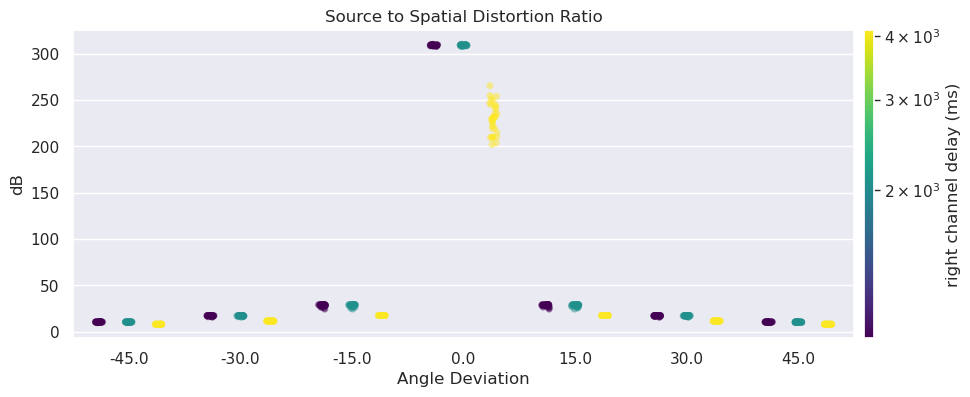

In [97]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))

ax = sns.stripplot(df,  y='spr/num', x='est_deviation', hue='dplot', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(df.dplot.min(), df.dplot.max()))
ax.set(ylabel='dB', title='Source to Spatial Distortion Ratio', xlabel='Angle Deviation')#, ylim=[-10, 50])
fig.colorbar(
    plt.cm.ScalarMappable(
        norm=mpl.colors.LogNorm(df.dplot.min(), df.dplot.max()), 
        cmap=palette
    ), 
    ax=ax, label='right channel delay (ms)', 
    pad=0.01, aspect=30, 
    ticks=np.array([0, 4, 16, 128, 256, 512])+1,
    format=lambda x, _: f"{x-1:d}"
)
ax.legend_.remove()
plt.show()

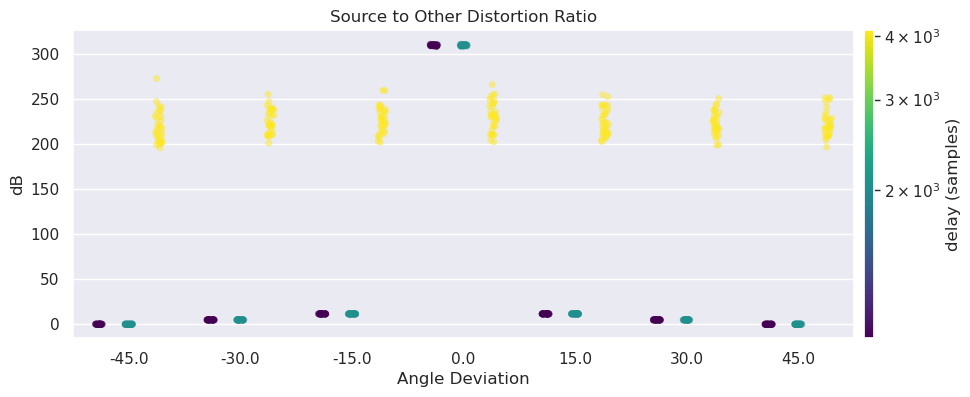

In [98]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))

ax = sns.stripplot(df,  y='sfr/num', x='est_deviation', hue='dplot', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()))
ax.set(ylabel='dB', title='Source to Other Distortion Ratio', xlabel='Angle Deviation')
fig.colorbar(
    plt.cm.ScalarMappable(
        norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()), 
        cmap=palette
    ), 
    ax=ax, label='delay (samples)', 
    pad=0.01, aspect=30, 
    ticks=np.array([0, 4, 16, 128, 256, 512])+1,
    format=lambda x, _: f"{x-1:d}"
)
ax.legend_.remove()
plt.show()

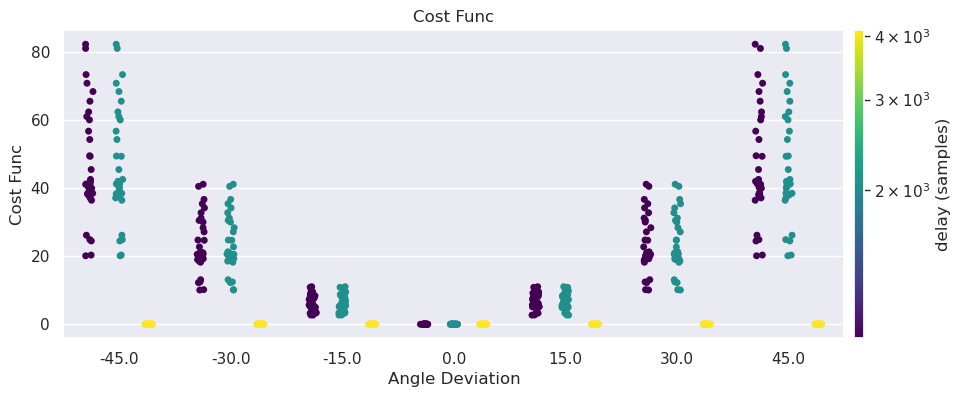

In [99]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='dplot', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()))
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Angle Deviation')
#
fig.colorbar(
    plt.cm.ScalarMappable(
        norm=mpl.colors.LogNorm(1+df.delay.min(), 1+df.delay.max()), 
        cmap=palette
    ), 
    ax=ax, label='delay (samples)', 
    pad=0.01, aspect=30, 
    ticks=np.array([0, 1, 16, 128, 256, 512])+1,
    format=lambda x, _: f"{x-1:d}"
)
ax.legend_.remove()
plt.show()